Based on these plots, the search criteria should be:
* $|l| < 15^\circ$
* $-20^\circ < b < 40^\circ$
* G > 10
* $\mu_b < -10~{\rm mas}~{\rm yr}^{-1}$

In [161]:
import os

from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
import h5py

from gala.observation import apparent_magnitude
import gala.dynamics as gd
import gala.coordinates as gc
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('apw-notebook')
plt.rcParams['figure.dpi'] = 72
%matplotlib inline

In [2]:
tgas_path = os.path.abspath("../data/tgas.hdf5")

In [3]:
d = np.load("../data/best-ophiuchus-model.npy")

In [4]:
oph = gd.CartesianPhaseSpacePosition(pos=d[:3]*u.kpc, 
                                     vel=d[3:]*u.kpc/u.Myr)

<IPython.core.display.Javascript object>


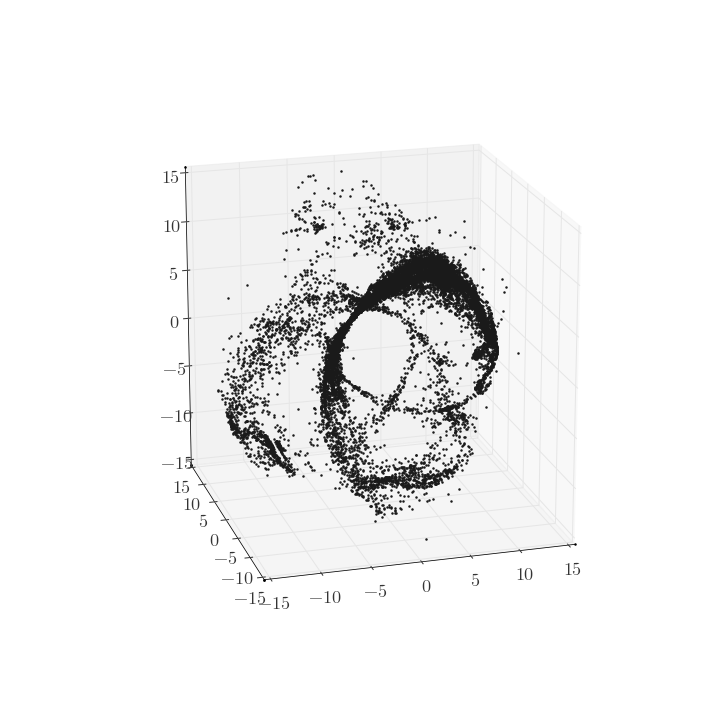

(-15, 15)

In [5]:
fig,ax = plt.subplots(figsize=(10,10), subplot_kw=dict(projection='3d'))
ax.plot(*oph.pos, linestyle='none')
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)
ax.set_zlim(-15,15)

In [6]:
idx = ((oph.pos[0] < 0*u.kpc) & (oph.pos[0] > -6*u.kpc) &
       (oph.pos[1] > -1*u.kpc) & (oph.pos[1] < 1*u.kpc) &
       (oph.pos[2] > -5*u.kpc) & (oph.pos[1] < 5*u.kpc))
       
oph_box = oph[idx]

<IPython.core.display.Javascript object>


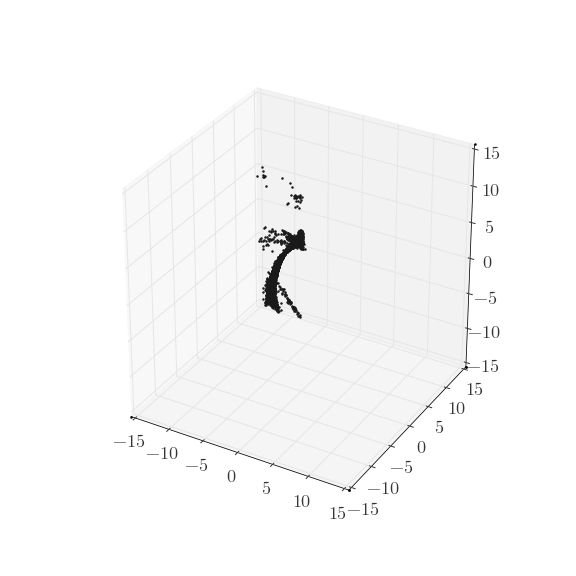

(-15, 15)

In [9]:
fig,ax = plt.subplots(figsize=(8,8), subplot_kw=dict(projection='3d'))
ax.plot(*oph_box.pos, linestyle='none')
ax.set_xlim(-15,15)
ax.set_ylim(-15,15)
ax.set_zlim(-15,15)

In [194]:
galactocentric_frame = coord.Galactocentric(z_sun=0.*u.pc,
                                            galcen_distance=8.3*u.kpc)
vcirc = 238.*u.km/u.s
vlsr = [-11.1, 12.24, 7.25]*u.km/u.s

gal,gal_v = oph_box.to_frame(coord.Galactic, galactocentric_frame=galactocentric_frame, 
                             vcirc=vcirc, vlsr=vlsr)
icrs,icrs_v = oph_box.to_frame(coord.ICRS, galactocentric_frame=galactocentric_frame, 
                               vcirc=vcirc, vlsr=vlsr)

<IPython.core.display.Javascript object>


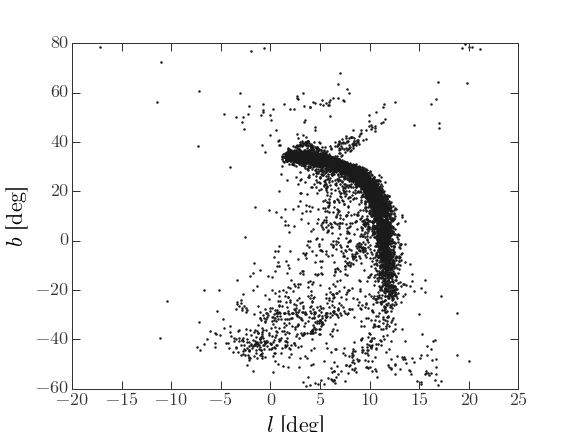

In [85]:
plt.figure()
plt.plot(gal.l.wrap_at(180*u.deg).degree, gal.b.degree, linestyle='none')
# plt.xlim(-60,60)
plt.xlabel('$l$ [deg]')
plt.ylabel('$b$ [deg]')

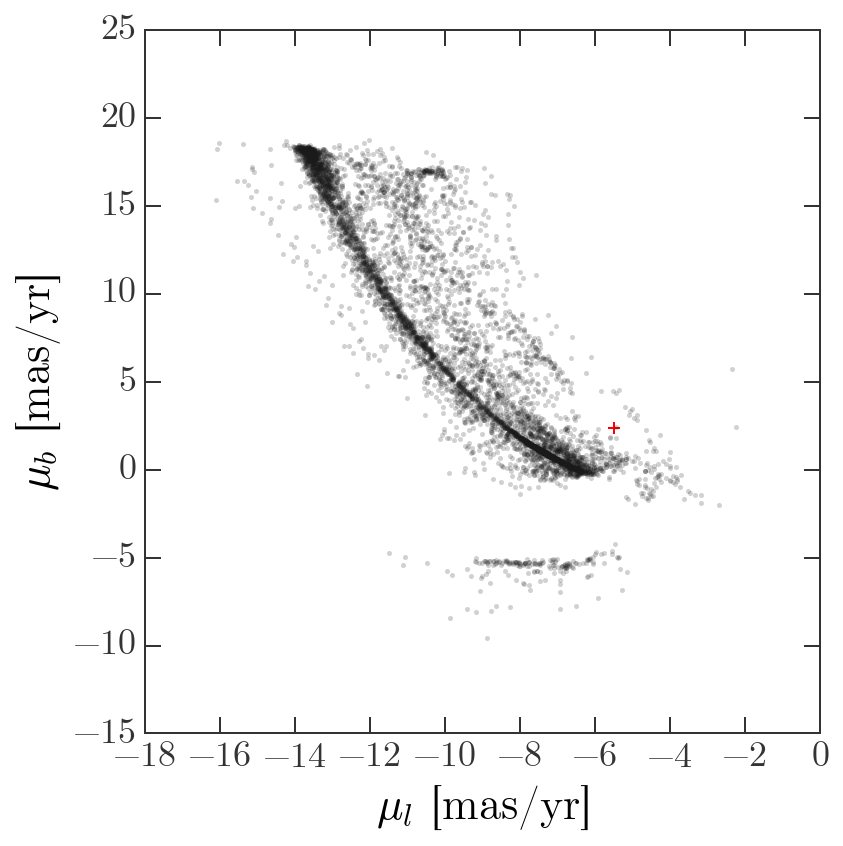

In [183]:
plt.figure(figsize=(6,6))
plt.plot(gal_v[0].to(u.mas/u.yr), gal_v[1].to(u.mas/u.yr), linestyle='none', alpha=0.2)
plt.scatter(-5.5, 2.4, marker='+', color='r', s=40)

plt.xlabel('$\mu_l$ [mas/yr]')
plt.ylabel('$\mu_b$ [mas/yr]')
plt.tight_layout()

In [192]:
# plt.figure(figsize=(6,6))
# plt.plot(np.sqrt(icrs_v[0]**2 + icrs_v[1]**2), np.sqrt(gal_v[0]**2 + gal_v[1]**2),
#          linestyle='none', alpha=0.2)

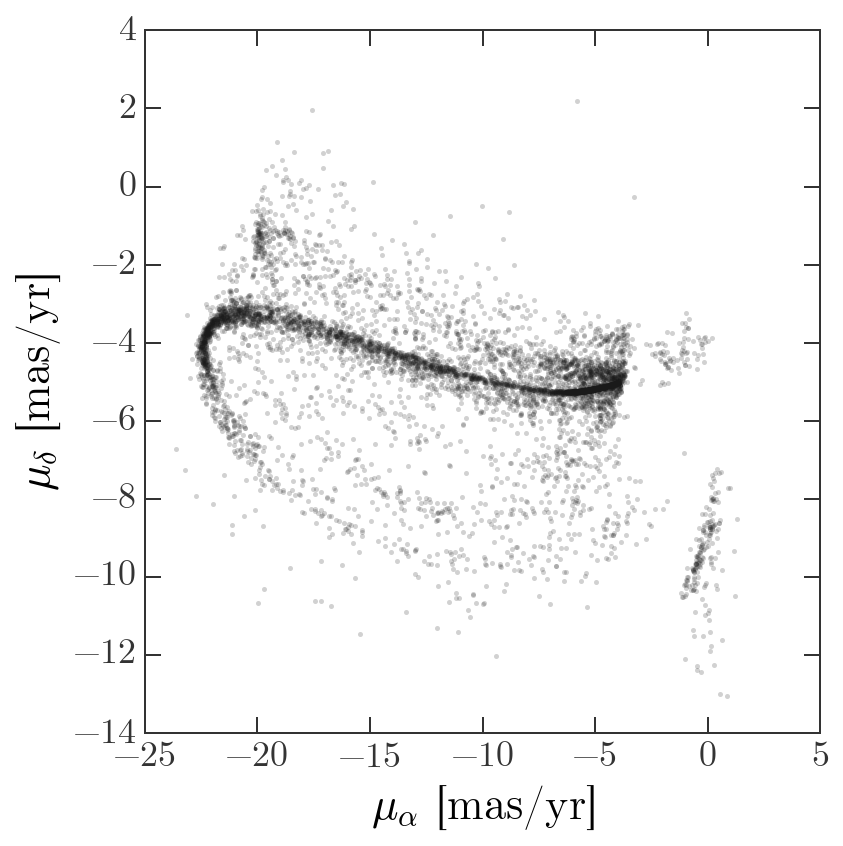

In [185]:
plt.figure(figsize=(6,6))
plt.plot(icrs_v[0].to(u.mas/u.yr), icrs_v[1].to(u.mas/u.yr), linestyle='none', alpha=0.2)

plt.xlabel(r'$\mu_\alpha$ [mas/yr]')
plt.ylabel(r'$\mu_\delta$ [mas/yr]')

plt.tight_layout()

<IPython.core.display.Javascript object>


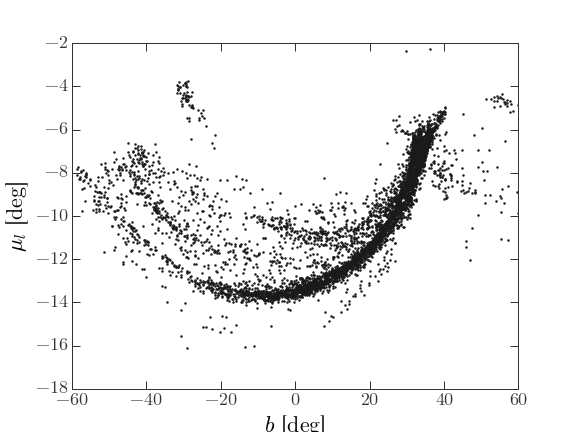

In [86]:
plt.figure()
plt.plot(gal.b.to(u.degree), gal_v[0].to(u.mas/u.yr), linestyle='none')
plt.xlim(-60,60)
plt.xlabel('$b$ [deg]')
plt.ylabel('$\mu_l$ [deg]')

<IPython.core.display.Javascript object>


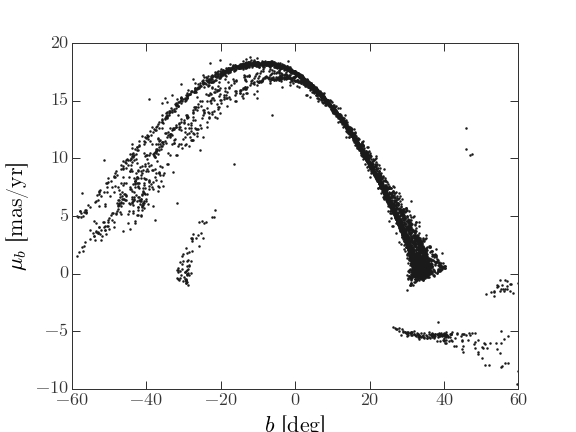

(-60, 60)

In [87]:
plt.figure()
plt.plot(gal.b.to(u.degree), gal_v[1].to(u.mas/u.yr), linestyle='none')
plt.xlabel('$b$ [deg]')
plt.ylabel(r'$\mu_b$ [mas/yr]')
plt.xlim(-60,60)

<IPython.core.display.Javascript object>


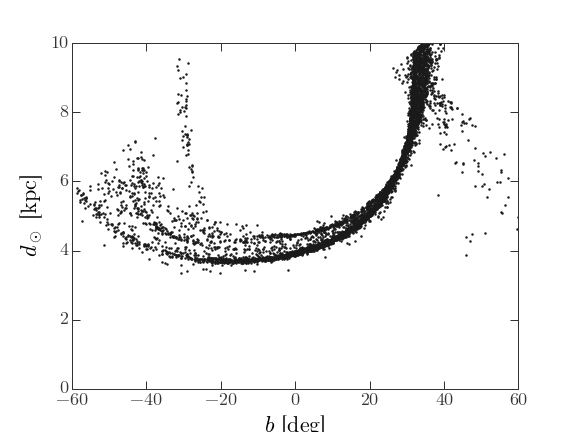

(0, 10)

In [88]:
plt.figure()
plt.plot(gal.b.to(u.degree), gal.distance.to(u.kpc), linestyle='none')
plt.xlabel('$b$ [deg]')
plt.ylabel(r'$d_\odot$ [kpc]')
plt.xlim(-60,60)
plt.ylim(0, 10)

<IPython.core.display.Javascript object>


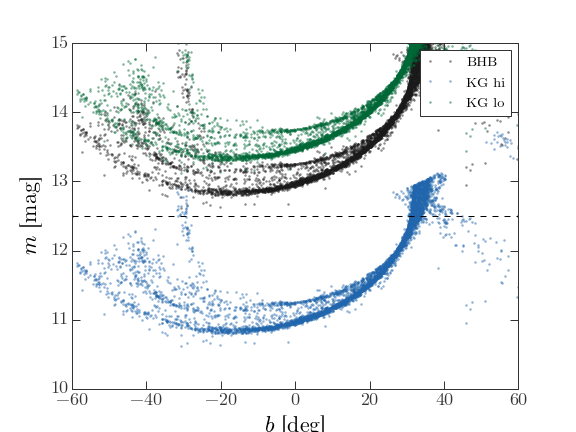

In [89]:
plt.figure()
plt.plot(gal.b.to(u.degree), apparent_magnitude(0, gal.distance.to(u.kpc)), 
         linestyle='none', label='BHB', alpha=0.5)
plt.plot(gal.b.to(u.degree), apparent_magnitude(-2, gal.distance.to(u.kpc)), 
         linestyle='none', label='KG hi', alpha=0.5)
plt.plot(gal.b.to(u.degree), apparent_magnitude(0.5, gal.distance.to(u.kpc)), 
         linestyle='none', label='KG lo', alpha=0.5)

plt.xlabel('$b$ [deg]')
plt.ylabel(r'$m$ [mag]')

plt.xlim(-60,60)
plt.ylim(10, 15)

plt.axhline(12.5, linestyle='dashed')

plt.legend()

<IPython.core.display.Javascript object>


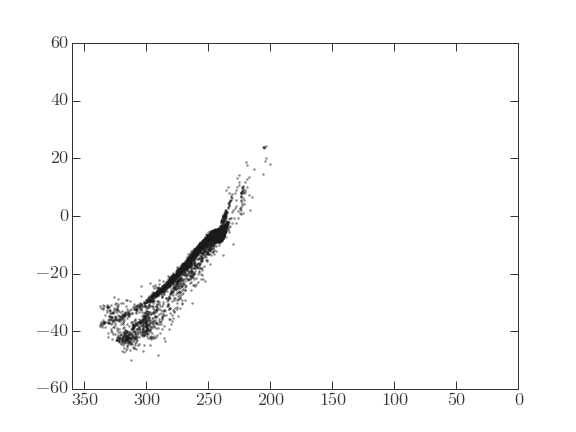

(-60, 60)

In [90]:
plt.figure()
plt.plot(icrs.ra.to(u.degree), icrs.dec.to(u.degree),
         linestyle='none', alpha=0.5)
plt.xlim(360, 0)
plt.ylim(-60,60)

## Load Gaia!

In [219]:
with h5py.File(tgas_path, 'r') as f:
    tgas = f['tgas'][:]
    tgas_c = coord.SkyCoord(ra=f['tgas']['ra']*u.degree, dec=f['tgas']['dec']*u.degree, 
                            distance=(f['tgas']['parallax']*u.mas).to(u.kpc, equivalencies=u.parallax()))
    Gmag = f['tgas']['phot_g_mean_mag']
    parallax = f['tgas']['parallax']*u.mas
    
    pm = np.vstack((f['tgas']['pmra'], f['tgas']['pmdec']))*u.mas/u.yr
    
    parallax_err = f['tgas']['parallax_error']*u.mas
    pm_err = np.vstack((f['tgas']['pmra_error'], f['tgas']['pmdec_error']))*u.mas/u.yr

In [13]:
pml,pmb = gc.pm_icrs_to_gal(tgas_c, pm) 

In [14]:
tgas_gal = tgas_c.galactic

In [15]:
pm_SN = np.sqrt(np.sum(pm**2, axis=0) / np.sum(pm_err**2, axis=0))

In [152]:
(3*u.kpc).to(u.mas, u.parallax())

<Quantity 0.33333333333333326 mas>

In [171]:
idx = ((tgas_gal.l < 15*u.deg) & (tgas_gal.l > 0*u.deg) & 
       (tgas_gal.b > -20*u.deg) & (tgas_gal.b < 32*u.deg) &
       (Gmag > 10.5) &
       (pml < -4*u.mas/u.yr) & (pml > -20*u.mas/u.yr) &
       (pmb > -2*u.mas/u.yr) & (pmb < 25*u.mas/u.yr) & 
       (pm_SN > 5) &
#        (pm_err[0] < 2.*u.mas/u.yr) & (pm_err[1] < 2.*u.mas/u.yr) &
       ((parallax < 1*u.mas) | (np.abs(parallax_err/parallax) >= 1)))

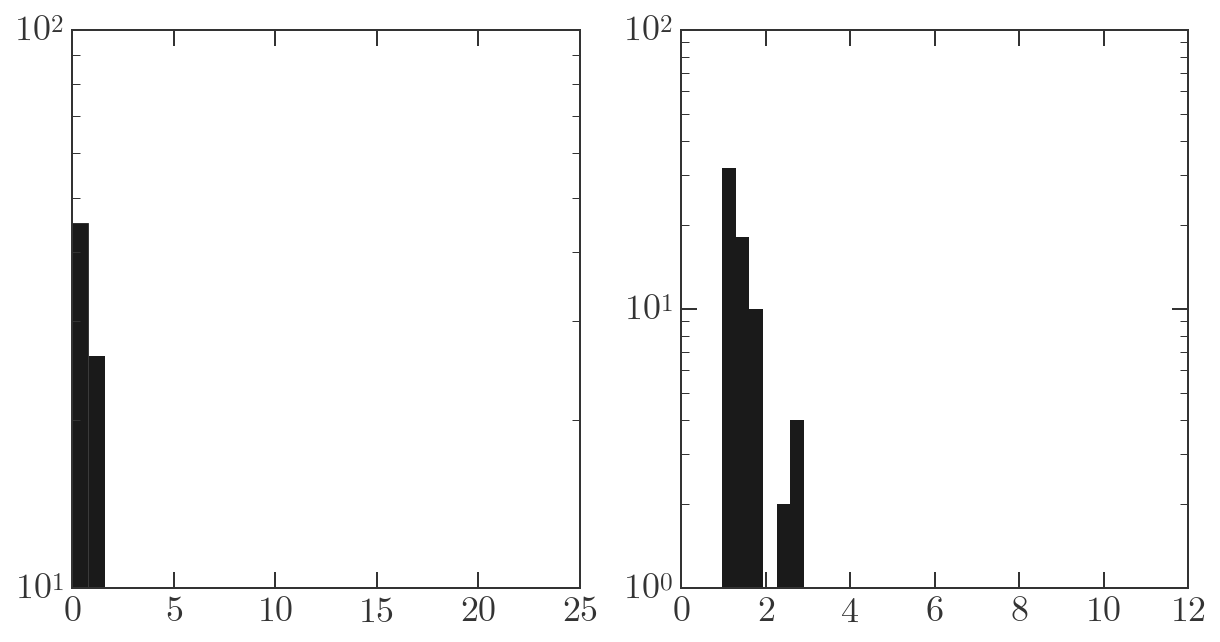

In [172]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(parallax[idx], bins=np.linspace(0, 25, 32))
axes[0].set_yscale('log')

axes[1].hist(1/parallax[idx], bins=np.linspace(0, 10, 32))
axes[1].set_yscale('log')

In [175]:
bins = (np.linspace(-25,0,64), np.linspace(-15,10,64))
H,xedg,yedg = np.histogram2d(icrs_v[0].to(u.mas/u.yr), icrs_v[1].to(u.mas/u.yr), bins=bins)

/Users/adrian/anaconda/envs/three/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


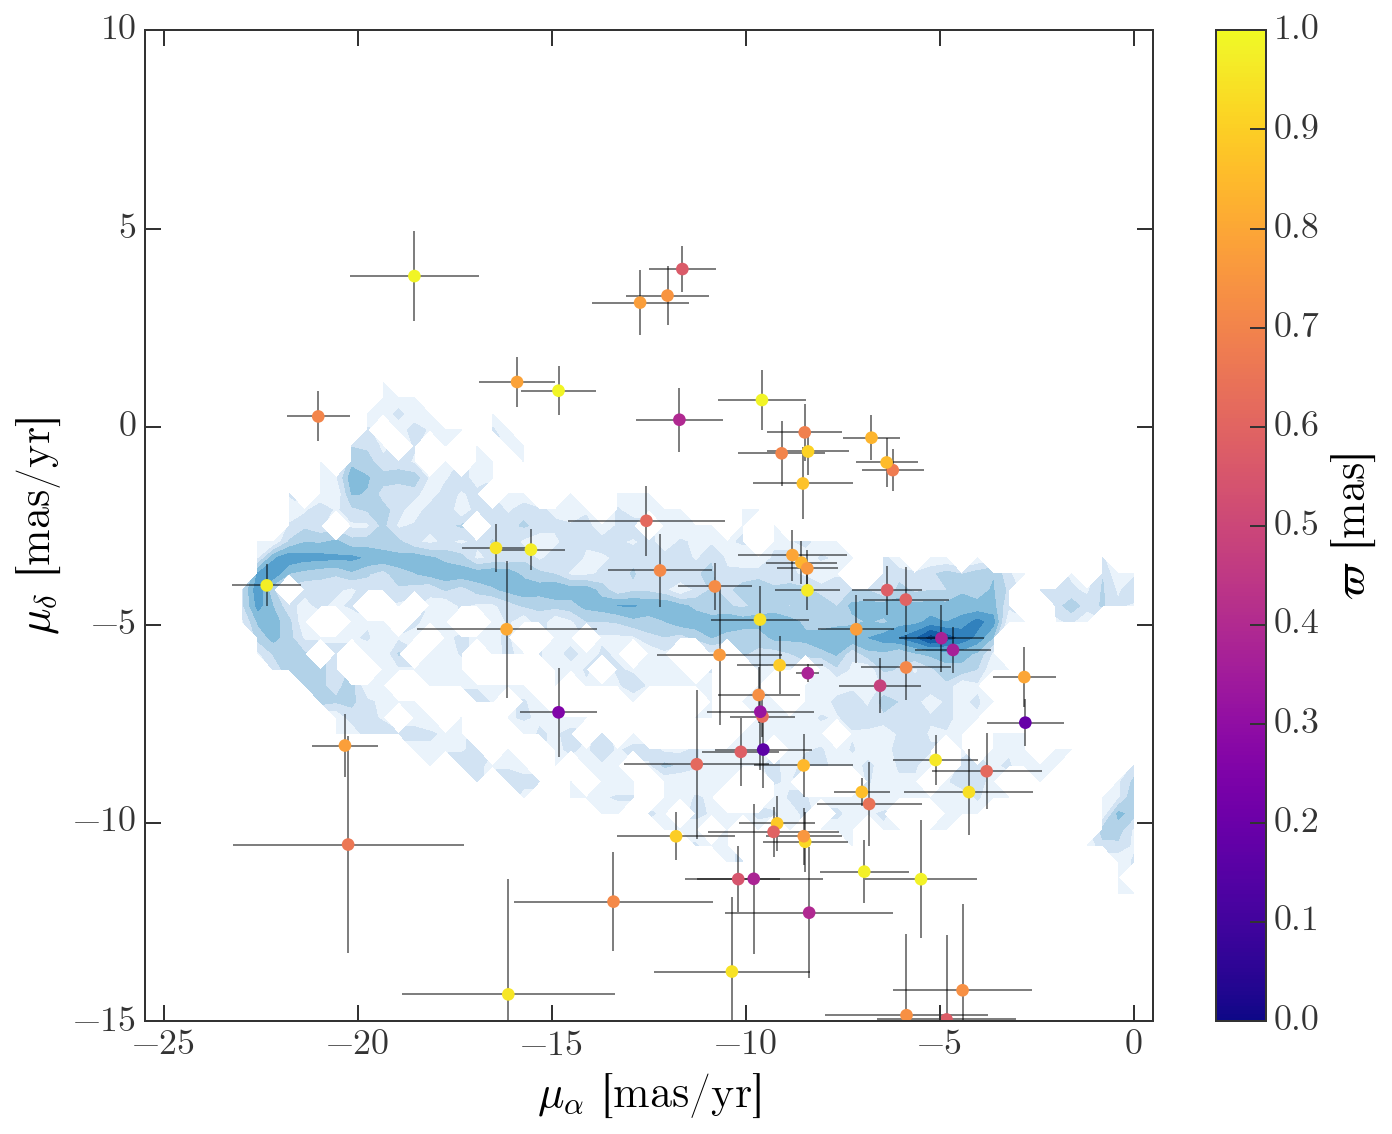

In [176]:
plt.figure(figsize=(10,8))

plt.contourf(np.log10(H).T, extent=[bins[0].min(),bins[0].max(),
                                    bins[1].min(),bins[1].max()], cmap='Blues', zorder=-100)

plt.errorbar(pm[0].value[idx], pm[1].value[idx], 
             xerr=pm_err[0].value[idx], yerr=pm_err[1].value[idx],
             linestyle='none', alpha=0.5, marker=None, color='k', zorder=-1)

plt.scatter(pm[0].value[idx], pm[1].value[idx], s=40,
            alpha=1., marker='o', c=parallax[idx], cmap='plasma', 
            vmin=0, vmax=1)

plt.xlabel(r'$\mu_\alpha$ [mas/yr]')
plt.ylabel(r'$\mu_\delta$ [mas/yr]')
plt.xlim(bins[0].min()-0.5,bins[0].max()+0.5)
plt.ylim(bins[1].min(),bins[1].max())

cb = plt.colorbar()
cb.set_label(r'$\varpi$ [mas]')

plt.tight_layout()

Sort by the projected density of the model

In [232]:
i = np.digitize(pm[0].value[idx], bins[0])
j = np.digitize(pm[1].value[idx], bins[1])

In [243]:
model_dens = np.zeros(len(i))
for k,a,b in zip(range(len(i)),i,j):
    model_dens[k] = H[a,b]
print(model_dens)

filter_idx_nums, = np.where(idx)
filter_idx_nums = filter_idx_nums[model_dens.argsort()[::-1]]
model_dens = model_dens[model_dens.argsort()[::-1]]
model_dens

[  1.   0.  11.   0.   0.   0.   0.  59.   1.  82.   0.   0.   2.   0.   0.
   2.   6.   1.   2.   0.   3.   0.  17.  20.   0.   0.   0.   2.   5.   1.
   0.   1.   0.   5.  75.   0.   0.   0.   1.   0.   1.   0.   0.   1.   0.
   0.   1.   3.  10.   6.   1.   1.   3.   1.   1.   1.   4.   4.   1.   1.
   0.   6.   0.   3.   0.   0.   0.   0.   9.   0.   0.]


array([ 82.,  75.,  59.,  20.,  17.,  11.,  10.,   9.,   6.,   6.,   6.,
         5.,   5.,   4.,   4.,   3.,   3.,   3.,   3.,   2.,   2.,   2.,
         2.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [244]:
sorted_targets_tgas = tgas[filter_idx_nums]
assert len(sorted_targets_tgas) == len(filter_idx_nums) # uniqueness

Validate I did that right!

/Users/adrian/anaconda/envs/three/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


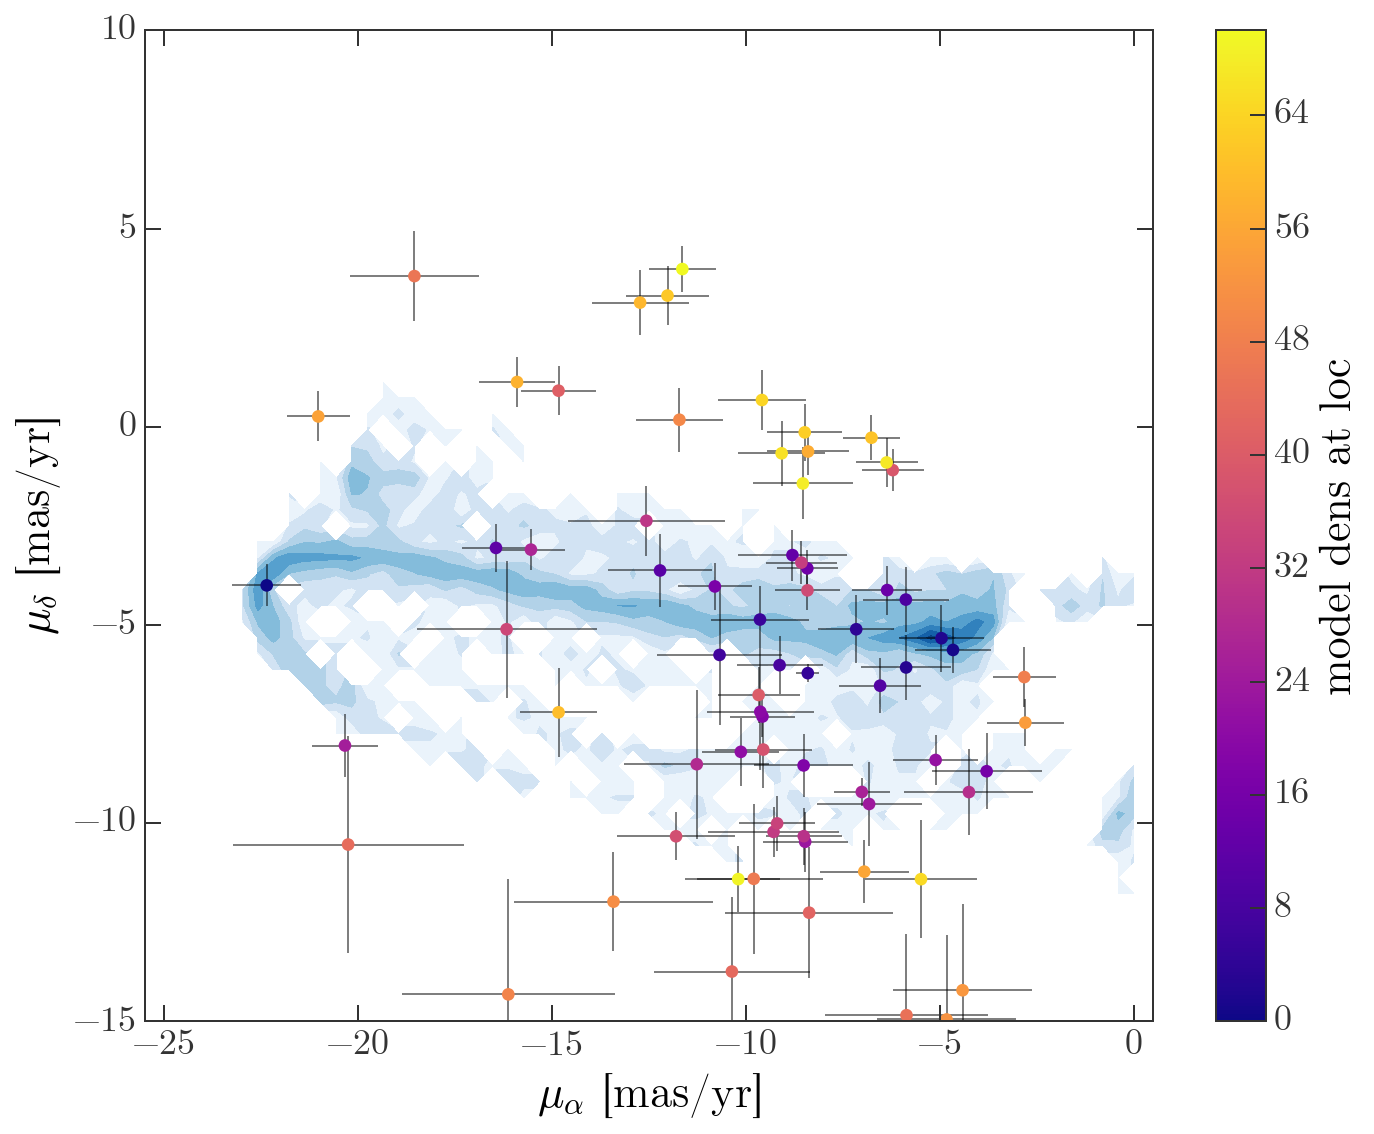

In [246]:
plt.figure(figsize=(10,8))

plt.contourf(np.log10(H).T, extent=[bins[0].min(),bins[0].max(),
                                    bins[1].min(),bins[1].max()], cmap='Blues', zorder=-100)

plt.errorbar(sorted_targets_tgas['pmra'], sorted_targets_tgas['pmdec'],
             xerr=sorted_targets_tgas['pmra_error'], yerr=sorted_targets_tgas['pmdec_error'],
             linestyle='none', alpha=0.5, marker=None, color='k', zorder=-1)

plt.scatter(sorted_targets_tgas['pmra'], sorted_targets_tgas['pmdec'], s=40,
            alpha=1., marker='o', c=range(len(model_dens)), cmap='plasma')

plt.xlabel(r'$\mu_\alpha$ [mas/yr]')
plt.ylabel(r'$\mu_\delta$ [mas/yr]')
plt.xlim(bins[0].min()-0.5,bins[0].max()+0.5)
plt.ylim(bins[1].min(),bins[1].max())

cb = plt.colorbar()
cb.set_label(r'model dens at loc')

plt.tight_layout()

In [248]:
fits.BinTableHDU(sorted_targets_tgas).writeto("../data/ophiuchus-candidates.fits")

---

In [173]:
bins_gal = (np.linspace(-25,0,64), np.linspace(-5,20,64))
H_gal,xedg_gal,yedg_gal = np.histogram2d(gal_v[0].to(u.mas/u.yr), gal_v[1].to(u.mas/u.yr), bins=bins_gal)

/Users/adrian/anaconda/envs/three/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


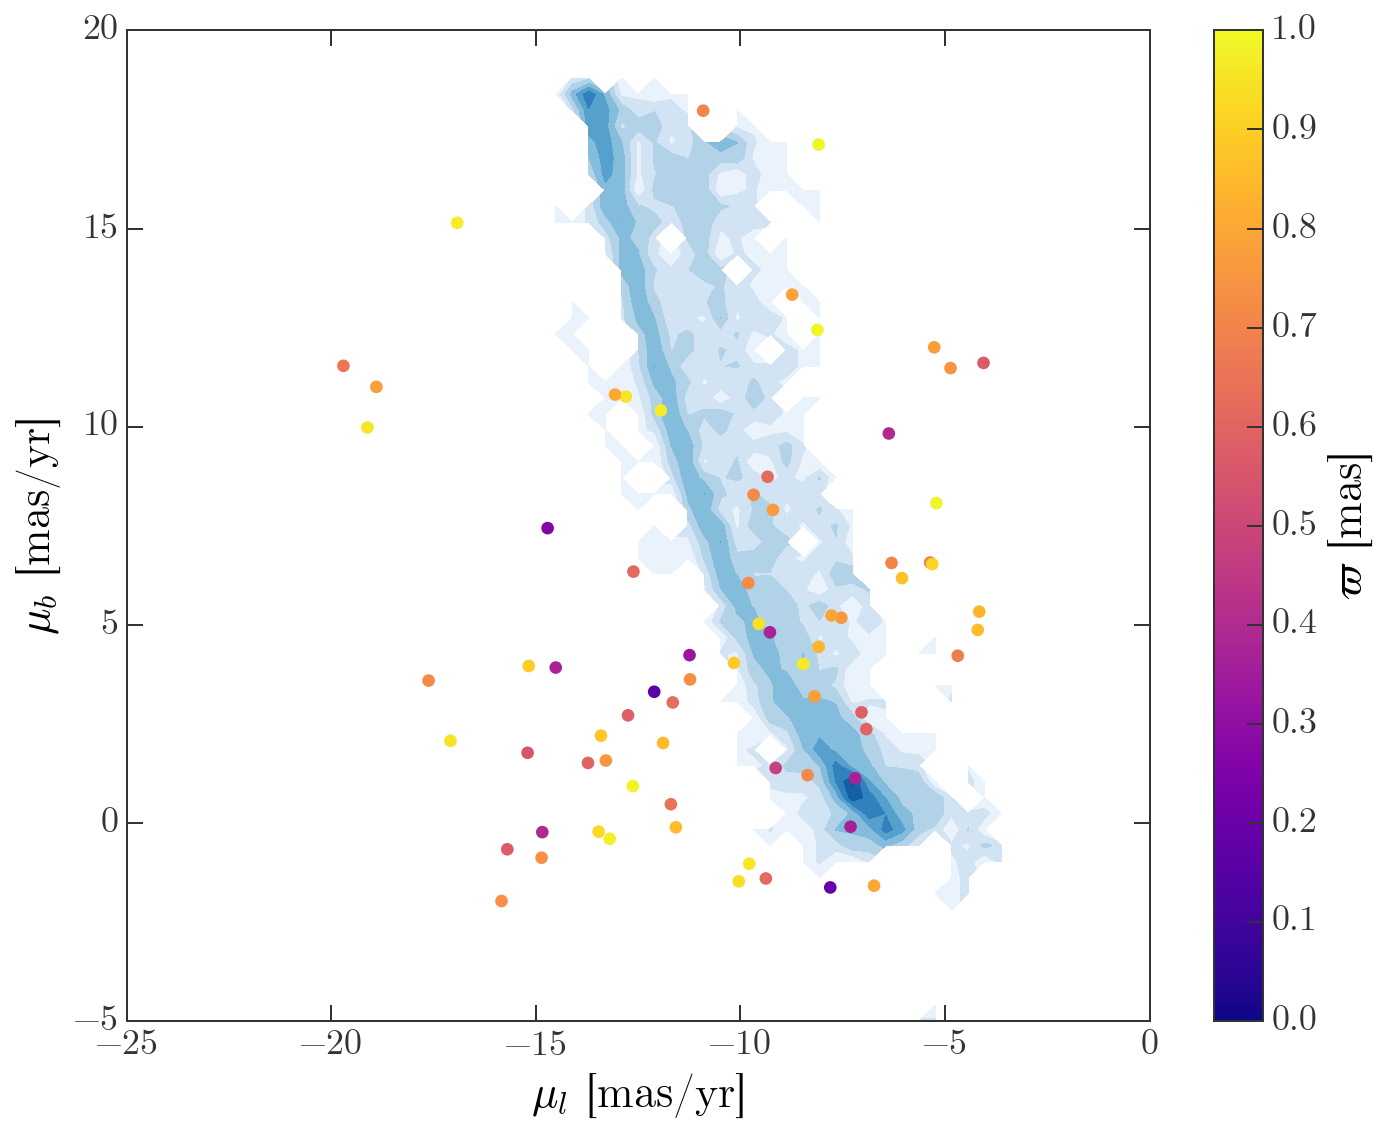

In [179]:
plt.figure(figsize=(10,8))

extent = [bins_gal[0].min(),bins_gal[0].max(), bins_gal[1].min(),bins_gal[1].max()]
plt.contourf(np.log10(H_gal).T, extent=extent, cmap='Blues', zorder=-100)

plt.scatter(pml.value[idx], pmb.value[idx], s=40,
            alpha=1., marker='o', c=parallax[idx], cmap='plasma', 
            vmin=0, vmax=1)

plt.xlabel(r'$\mu_l$ [mas/yr]')
plt.ylabel(r'$\mu_b$ [mas/yr]')
plt.xlim(bins_gal[0].min(),bins_gal[0].max())
plt.ylim(bins_gal[1].min(),bins_gal[1].max())


cb = plt.colorbar()
cb.set_label(r'$\varpi$ [mas]')

plt.tight_layout()

In [177]:
len(pm[0].value[idx])

71

<IPython.core.display.Javascript object>


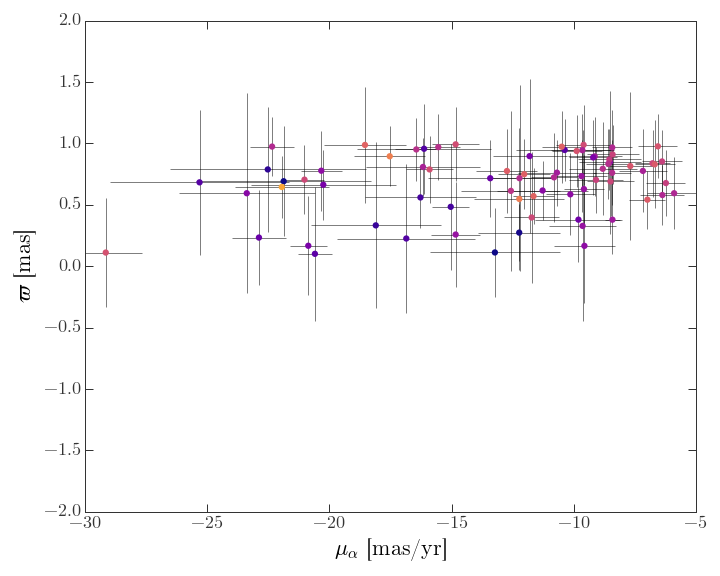

In [150]:
plt.figure(figsize=(10,8))

plt.errorbar(pm[0].value[idx], parallax.value[idx], 
             xerr=pm_err[0].value[idx], yerr=parallax_err.value[idx],
             linestyle='none', alpha=0.5, marker=None, color='k', zorder=-1)

plt.scatter(pm[0].value[idx], parallax.value[idx], c=pm[1].value[idx], s=40,
            alpha=1., marker='o', cmap='plasma', 
            vmin=-20, vmax=20)

plt.xlabel(r'$\mu_\alpha$ [mas/yr]')
plt.ylabel(r'$\varpi$ [mas]')
plt.xlim(bins[0].min(),bins[0].max())
# plt.ylim(bins[1].min(),bins[1].max())

# cb = plt.colorbar()
# cb.set_label(r'$\varpi$ [mas]')

plt.tight_layout()